In [1]:
import pandas as pd
df=pd.read_csv('income.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          8993 non-null   object
 1   SEX             8993 non-null   object
 2   MARITAL.STATUS  8833 non-null   object
 3   AGE             8993 non-null   object
 4   EDUCATION       8907 non-null   object
 5   OCCUPATION      8857 non-null   object
 6   AREA            8080 non-null   object
 7   DUAL.INCOMES    8993 non-null   object
 8   HOUSEHOLD.SIZE  8618 non-null   object
 9   UNDER18         3269 non-null   object
 10  HOUSEHOLDER     8753 non-null   object
 11  HOME.TYPE       8636 non-null   object
 12  ETHNIC.CLASS    8925 non-null   object
 13  LANGUAGE        8634 non-null   object
dtypes: object(14)
memory usage: 983.7+ KB


In [3]:
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype=='object':
            df[col].fillna(df[col].mode()[0],inplace=True)
        else:
            df[col].fillna(df[col].mean(),inplace=True)


C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_8880\3853160622.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          8993 non-null   object
 1   SEX             8993 non-null   object
 2   MARITAL.STATUS  8993 non-null   object
 3   AGE             8993 non-null   object
 4   EDUCATION       8993 non-null   object
 5   OCCUPATION      8993 non-null   object
 6   AREA            8993 non-null   object
 7   DUAL.INCOMES    8993 non-null   object
 8   HOUSEHOLD.SIZE  8993 non-null   object
 9   UNDER18         8993 non-null   object
 10  HOUSEHOLDER     8993 non-null   object
 11  HOME.TYPE       8993 non-null   object
 12  ETHNIC.CLASS    8993 non-null   object
 13  LANGUAGE        8993 non-null   object
dtypes: object(14)
memory usage: 983.7+ KB


In [5]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

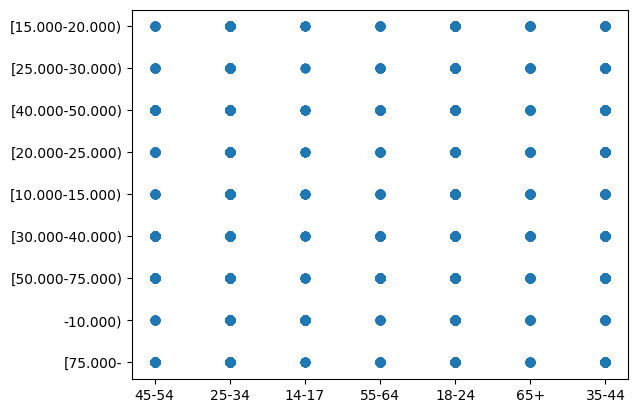

In [6]:
plt.scatter(df['AGE'],df['INCOME'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
le_age = LabelEncoder()
le_income = LabelEncoder()

df_copy['AGE'] = le_age.fit_transform(df_copy['AGE'])
df_copy['INCOME'] = le_income.fit_transform(df_copy['INCOME'])


from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
y_pred = km.fit_predict(df_copy[['AGE', 'INCOME']])


In [11]:
km=KMeans(n_clusters=3)

In [12]:
km

KMeans(n_clusters=3)

In [15]:
y_pred=km.fit_predict(df_copy[['AGE','INCOME']])

In [16]:
y_pred

array([1, 1, 1, ..., 0, 2, 1], shape=(8993,), dtype=int32)

In [18]:
df_copy['clusters']=y_pred
df_copy.head(10)

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE,clusters
0,8,F,Married,4,1 to 3 years of college,Homemaker,10+ years,No,Three,One,Own,House,White,English,1
1,8,M,Married,4,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English,1
2,8,F,Married,2,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English,1
3,0,F,Single,0,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English,0
4,0,F,Single,0,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English,0
5,7,M,Married,5,1 to 3 years of college,Retired,10+ years,No,Two,One,Own,House,White,English,1
6,0,M,Single,1,Graduated High Scool,Unemployed,7-10 years,Not Married,Three,One,Rent,Apartment,White,English,0
7,5,M,Divorced,2,1 to 3 years of college,Factory Worker/Laborer/Driver,10+ years,Not Married,One,One,Rent,Apartment,White,English,1
8,1,M,Married,5,Graduated High Scool,Retired,10+ years,No,Three,One,Rent,Apartment,White,English,2
9,3,M,Married,6,1 to 3 years of college,Retired,7-10 years,No,Two,One,Rent,Apartment,White,English,2


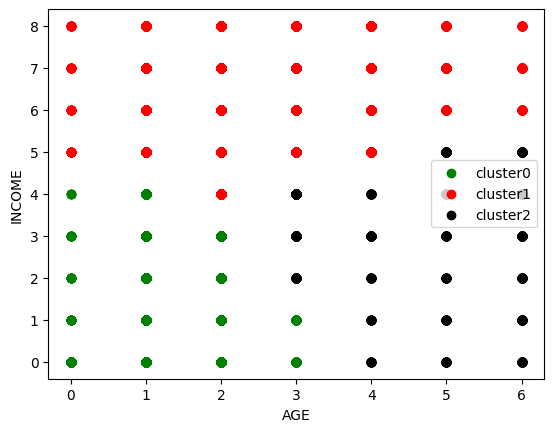

In [19]:
df1=df_copy[df_copy.clusters==0]
df2=df_copy[df_copy.clusters==1]
df3=df_copy[df_copy.clusters==2]
plt.scatter(df1['AGE'],df1['INCOME'],color='green',label='cluster0')
plt.scatter(df2['AGE'],df2['INCOME'],color='red',label='cluster1')
plt.scatter(df3['AGE'],df3['INCOME'],color='black',label='cluster2')
plt.xlabel('AGE')
plt.ylabel('INCOME')
plt.legend()
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          8993 non-null   object
 1   SEX             8993 non-null   object
 2   MARITAL.STATUS  8993 non-null   object
 3   AGE             8993 non-null   object
 4   EDUCATION       8993 non-null   object
 5   OCCUPATION      8993 non-null   object
 6   AREA            8993 non-null   object
 7   DUAL.INCOMES    8993 non-null   object
 8   HOUSEHOLD.SIZE  8993 non-null   object
 9   UNDER18         8993 non-null   object
 10  HOUSEHOLDER     8993 non-null   object
 11  HOME.TYPE       8993 non-null   object
 12  ETHNIC.CLASS    8993 non-null   object
 13  LANGUAGE        8993 non-null   object
 14  clusters        8993 non-null   int32 
dtypes: int32(1), object(14)
memory usage: 1018.9+ KB


In [21]:
import numpy as np

In [22]:
km.cluster_centers_

array([[1.09883547, 1.07226038],
       [2.78644999, 6.36415656],
       [4.60078431, 2.84862745]])

In [23]:
centers=km.cluster_centers_

In [24]:
centers

array([[1.09883547, 1.07226038],
       [2.78644999, 6.36415656],
       [4.60078431, 2.84862745]])

In [25]:
y_pred

array([1, 1, 1, ..., 0, 2, 1], shape=(8993,), dtype=int32)